In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
from matplotlib.backends.backend_pdf import PdfPages
import subprocess
import numpy as np
from pylab import rcParams

In [2]:
def savefig(name, **kwargs):
    fn = "../../paper/fig/{}.pdf".format(name)
    pp = PdfPages(fn)
    pp.savefig(dpi=1200, bbox_inches="tight", **kwargs)
    pp.close()
    print("saving and cropping ", fn)
    subprocess.run(["pdfcrop", fn, fn])

In [3]:
df = pd.read_excel("green500_top_202011.xlsx")
df = df[df["Power Efficiency [GFlops/Watts]"] > 0]
df = df[df["Accelerator/Co-Processor"] == "None"]

In [10]:
d = {'Intel Cascade lake':'Intel Cascade Lake'}
df=df.replace(d)
d = {'AMD Zen-2 (Rome)':'AMD Zen 2 (Rome)'}
df=df.replace(d)
df5 = df.copy()
for processor, g in df.groupby("Processor Technology"):
    print(processor)
    print("     {} systems".format(len(g)))
    print("     {} [GFlopps/Watts] mean efficiency".format(g["Power Efficiency [GFlops/Watts]"].mean()))
    print("     {} [GFlopps/Watts] max efficiency".format(g["Power Efficiency [GFlops/Watts]"].max()))
    if len(g) <= 5:
        df5 = df5[df5["Processor Technology"] != processor]

AMD Zen-2 (Rome)
     7 systems
     4.913773801428571 [GFlopps/Watts] mean efficiency
     5.161157025 [GFlopps/Watts] max efficiency
Fujitsu ARM
     2 systems
     16.146995595 [GFlopps/Watts] mean efficiency
     16.87626604 [GFlopps/Watts] max efficiency
Intel Broadwell
     28 systems
     2.0467746918214287 [GFlopps/Watts] mean efficiency
     2.926586826 [GFlopps/Watts] max efficiency
Intel Cascade Lake
     16 systems
     4.0068518633125 [GFlopps/Watts] mean efficiency
     5.843478261 [GFlopps/Watts] max efficiency
Intel Haswell
     17 systems
     1.6990323703470587 [GFlopps/Watts] mean efficiency
     2.697741935 [GFlopps/Watts] max efficiency
Intel IvyBridge
     3 systems
     0.7813580715 [GFlopps/Watts] mean efficiency
     1.350476515 [GFlopps/Watts] max efficiency
Intel SandyBridge
     2 systems
     0.7593966399500001 [GFlopps/Watts] mean efficiency
     0.8813636364 [GFlopps/Watts] max efficiency
Intel Skylake
     48 systems
     3.138264453416667 [GFlopps/Watts

saving and cropping  ../../paper/fig/green500-pe.pdf


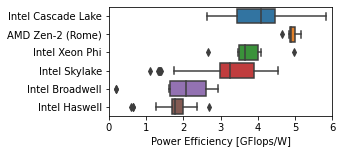

In [11]:
# Fix bad unit
rcParams['figure.figsize'] = 4, 2
_pe = "Power Efficiency [GFlops/W]"
df5[_pe] = df5["Power Efficiency [GFlops/Watts]"]
sns.boxplot(
    data=df5,
    y="Processor Technology",
    x=_pe,
)
plt.gca().set_ylabel("")
plt.gca().set_xlim(0,6)
savefig("green500-pe")